<a href="https://colab.research.google.com/github/saffarizadeh/BUAN4061/blob/main/TensorFlow_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://saffarizadeh.com/Logo.png" width="300px"/>

# *BUAN 4061: Advanced Business Analytics*

# **TensorFlow Datasets**

Instructor: Dr. Kambiz Saffarizadeh

---

List of available datasets:

https://www.tensorflow.org/datasets/catalog/overview

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

`tfds` shows a progress bar when dowloading datasets. If you wish to disable the progress bar, run the following code:

In [ ]:
tfds.disable_progress_bar()

# Loading Data via `keras.datasets`

In [ ]:
(training_images_1, training_labels_1), (test_images_1, test_labels_1) =  tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
training_images_1.shape

(60000, 28, 28)

# Loading Data via `tfds`

Read the following documentation to learn how tfds.load works:

https://www.tensorflow.org/datasets/api_docs/python/tfds/load

You can retrieve the same dataset via `tfds` using the following code:

In [ ]:
(training_images_2, training_labels_2), (test_images_2, test_labels_2) =  tfds.as_numpy(tfds.load('fashion_mnist', split = ['train', 'test'], batch_size = -1, as_supervised=True))

In [ ]:
training_images_2.shape

(60000, 28, 28, 1)

While this code is more complicated, it gives us more flexibility to work with the dataset.

In the code above, we attempted to get the whole dataset by setting `batch_size = -1` and convert the whole dataset to numpy (`tfds.as_numpy()`) so that the result look similar to our previous examples.

However, in reality we don't need to take these steps to train our models. Instead, we use the following approach.

## Creating train and validation splits

In [ ]:
data = tfds.load('fashion_mnist', split='train', as_supervised=True)
val_data = tfds.load('fashion_mnist', split='test', as_supervised=True)

In [ ]:
data

<PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

## Creating train, validation, and test splits

We can use TensorFlow's subsplit API:

In [ ]:
train_data, info = tfds.load('horses_or_humans', split='train[:80%]', as_supervised=True, with_info = True)
validation_data = tfds.load('horses_or_humans', split='train[80%:]', as_supervised=True)
test_data = tfds.load('horses_or_humans', split='test', as_supervised=True)

In [ ]:
train_data

<PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
info

tfds.core.DatasetInfo(
    name='horses_or_humans',
    version=3.0.0,
    description='A large set of images of horses and humans.',
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=1283,
    splits={
        'test': 256,
        'train': 1027,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
    }""",
    redistribution_info=,
)

In [ ]:
info.features['label'].names

['horses', 'humans']

In [ ]:
classes = info.features['label'].names

Alternatively, we can load the data as follows:

In [ ]:
[train_data, validation_data, test_data], info = tfds.load('horses_or_humans', split=['train[:80%]', 'train[80%:]', 'test'], as_supervised=True, with_info = True)

In [ ]:
train_data

<PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
info

tfds.core.DatasetInfo(
    name='horses_or_humans',
    version=3.0.0,
    description='A large set of images of horses and humans.',
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=1283,
    splits={
        'test': 256,
        'train': 1027,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
    }""",
    redistribution_info=,
)

Read the following notebook to learn more about loading datasets via `tfds`.

https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb

# Augmenting data from `tfds`

First you need to install the `tensorflow-addons`.

In [ ]:
!pip install tensorflow-addons

In [ ]:
import tensorflow_addons as tfa

Now we can use this addon whenever needed.

We start by creating a function that can be used to augment the data.

In [ ]:
def augment_images(image, label):
  image = tf.cast(image, tf.float32)
  image = image / 255.
  image = tf.image.random_flip_left_right(image)
  image = tfa.image.rotate(image, 40, interpolation='NEAREST')
  return image, label

In [ ]:
train = train_data.map(augment_images)

In [ ]:
train_batches = train.shuffle(100).batch(32).prefetch(1)

In [ ]:
validation_batches = validation_data.batch(32).prefetch(1)

In [ ]:
test_batches = test_data.batch(32)

In [ ]:
horse_human_model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1) # you could also solve this problem with 2 nodes each of which representing a class
])

In [ ]:
horse_human_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = horse_human_model.fit(train_batches, epochs=10, validation_data=validation_batches)

Epoch 1/10
26/26 [==============================] - 27s 457ms/step - loss: 0.5854 - accuracy: 0.6277 - val_loss: 35.0922 - val_accuracy: 0.7951
Epoch 2/10
26/26 [==============================] - 9s 311ms/step - loss: 0.1742 - accuracy: 0.9282 - val_loss: 216.9954 - val_accuracy: 0.6537
Epoch 3/10
26/26 [==============================] - 9s 303ms/step - loss: 0.1408 - accuracy: 0.9501 - val_loss: 162.1330 - val_accuracy: 0.6537
Epoch 4/10
26/26 [==============================] - 9s 301ms/step - loss: 0.0677 - accuracy: 0.9781 - val_loss: 220.7627 - val_accuracy: 0.5610
Epoch 5/10
26/26 [==============================] - 9s 299ms/step - loss: 0.0712 - accuracy: 0.9769 - val_loss: 353.5591 - val_accuracy: 0.5707
Epoch 6/10
26/26 [==============================] - 9s 302ms/step - loss: 0.0524 - accuracy: 0.9805 - val_loss: 265.4537 - val_accuracy: 0.4927
Epoch 7/10
26/26 [==============================] - 9s 304ms/step - loss: 0.0447 - accuracy: 0.9830 - val_loss: 406.0105 - val_accuracy:

In [ ]:
horse_human_model.evaluate(test_batches)

8/8 [==============================] - 1s 68ms/step - loss: 316.9380 - accuracy: 0.6016


[316.9380187988281, 0.6015625]

In [ ]:
image_batch, label_batch = next(iter(validation_batches.take(1)))
image_batch = image_batch.numpy()
label_batch = label_batch.numpy()

In [ ]:
final_horse_human_model = tf.keras.Sequential([
  horse_human_model,
  tf.keras.layers.Activation('sigmoid')
])

In [ ]:
num = 5

Real Label: horses
Predicted Label: 0.0 probability that this is a human (vs. horse).


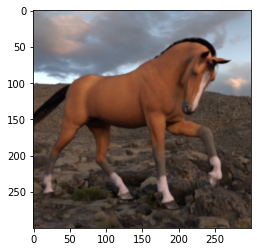

In [ ]:
image = image_batch[num][np.newaxis,...]

plt.imshow(image_batch[num])
print(f'Real Label: {classes[label_batch[num]]}')
print(f'Predicted Label: {float(final_horse_human_model.predict(image))} probability that this is a human (vs. horse).')

# Extra Example: Cats vs Dogs

In [ ]:
(train_examples, validation_examples), info = tfds.load(
    'cats_vs_dogs',
    split = ['train[:80%]', 'train[80%:]'],
    with_info = True,
    as_supervised = True
)

In [ ]:
info

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    version=4.0.0,
    description='A large set of images of cats and dogs.There are 1738 corrupted images that are dropped.',
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=23262,
    splits={
        'train': 23262,
    },
    supervised_keys=('image', 'label'),
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
    title = {Asirra: A CAPTCHA that Exploits Interest-Aligned Manual Image Categorization},
    booktitle = {Proceedings of 14th ACM Conference on Computer and Communications Security (CCS)},
    ye

In [ ]:
def augment_images(image, label):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, (224, 224))/255.
  image = tf.image.random_flip_left_right(image)
  image = tfa.image.rotate(image, 40, interpolation='NEAREST')
  return image, label

In [ ]:
train__examples_batches = train_examples.cache().shuffle(1000).map(augment_images).batch(32).prefetch(1)
validation__examples_batches = validation_examples.map(augment_images).batch(32).prefetch(1)

In [ ]:
import tensorflow_hub as hub
feature_extractor = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", input_shape = (224,224,3), trainable=False)

In [ ]:
cat_dog_model = tf.keras.Sequential([
  feature_extractor,
  tf.keras.layers.Dense(1) # you could also solve this problem with 2 nodes each of which representing a class
])

In [ ]:
cat_dog_model.compile(
    optimizer = 'adam',
    loss = tf.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
history = cat_dog_model.fit(train__examples_batches, epochs = 3, validation_data = validation__examples_batches)

Epoch 1/3
582/582 [==============================] - 138s 230ms/step - loss: 0.2656 - accuracy: 0.8783 - val_loss: 0.2098 - val_accuracy: 0.9069
Epoch 2/3
582/582 [==============================] - 109s 188ms/step - loss: 0.2032 - accuracy: 0.9133 - val_loss: 0.1894 - val_accuracy: 0.9196
Epoch 3/3
582/582 [==============================] - 109s 188ms/step - loss: 0.1916 - accuracy: 0.9172 - val_loss: 0.1957 - val_accuracy: 0.9134


In [ ]:
final_cat_dog_model = tf.keras.Sequential([
  cat_dog_model,
  tf.keras.layers.Activation('sigmoid')
])

In [ ]:
classes = info.features['label'].names
classes

['cat', 'dog']

In [ ]:
image_batch, label_batch = next(iter(validation__examples_batches.take(1)))
image_batch = image_batch.numpy()
label_batch = label_batch.numpy()

In [ ]:
num = 10

Real Label: dog
Predicted Label: 0.8258636593818665 probability that this is a dog.


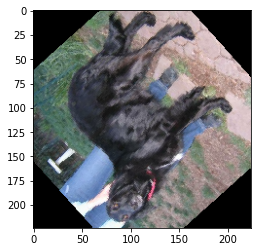

In [ ]:
image = image_batch[num][np.newaxis,...]

plt.imshow(image_batch[num])
print(f'Real Label: {classes[label_batch[num]]}')
print(f'Predicted Label: {float(final_cat_dog_model.predict(image))} probability that this is a dog (vs. cat).')